# Spotify ML Models

### Data Packages Setup

In [79]:
# Data
import numpy as np
import pandas as pd 

# Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns 


# Warning Suppression 
import warnings
warnings.filterwarnings('ignore')

### Import Dataset (Huggingface)

In [80]:
# Spotify dataset from Huggingface in pd 
# https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

### Explore Dataset

- Basic Statistical Analysis 

In [81]:
# Shape of dataframe
print(f"Dataframe shape: {df.shape}")

Dataframe shape: (114000, 21)


In [82]:
# Information of dataframe for dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [83]:
# Check for null values 
print(f"Null values:\n{df.isnull().sum()}")

Null values:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [84]:
# Check unique counts 
print(f"Unique values:\n{df.nunique()}")

Unique values:
Unnamed: 0          114000
track_id             89741
artists              31437
album_name           46589
track_name           73608
popularity             101
duration_ms          50697
explicit                 2
danceability          1174
energy                2083
key                     12
loudness             19480
mode                     2
speechiness           1489
acousticness          5061
instrumentalness      5346
liveness              1722
valence               1790
tempo                45653
time_signature           5
track_genre            114
dtype: int64


In [85]:
# Statistical Inference
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [86]:
# Dataframe Head (Against Attribute Dictionary)
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


- Data Preprocessing based off above observations

In [87]:
def df_cleaning(df):
    """
    Generic function to process/clean above dataframe

    Args:
        df (pd.Dataframe)
        
    Return:
        pd.Dataframe(Cleaned dataframe)    
        
    """
    
    # Create new copy of df for processing
    df_cleaned = df.copy()
    
    # Store shape 
    old_rows = df_cleaned.shape[0]
    print (f"Processing:\nCreated copy of existing df with {old_rows} records")
    
    # Drop null values
    df_cleaned = df_cleaned.dropna()
    rows_removed = old_rows - df_cleaned.shape[0]
    print (f"Removed {rows_removed} records with null value")
    
    # Drop columns not needed 
    cols_drop = ['Unnamed: 0', 'track_id', 'explicit', 'time_signature'] # Change as required
    df_cleaned = df_cleaned.drop(columns = cols_drop)
    print (f"Dropped {cols_drop} columns\nNo of columns dropped: {len(cols_drop)}")
    print (f"Cleaned df shape:{df_cleaned.shape}")
    
    return df_cleaned


'artists', 'album_name', 'track_name', 'track_genre'

ABC dropping of columns

In [88]:
# Cleaning function implemented 
cleaned_df = df_cleaning(df)

Processing:
Created copy of existing df with 114000 records
Removed 1 records with null value
Dropped ['Unnamed: 0', 'track_id', 'explicit', 'time_signature'] columns
No of columns dropped: 4
Cleaned df shape:(113999, 17)


Target Variable is 'popularity' (ML model to predict for). 

For purposes of model training feature engineering ```'popularity_class'``` will be created, where:

| popularity_class       | Encoded Value | Meaning   |
| ---------------------- | ------------- | --------- |
| 0–49                   | 0             | Unpopular |
| 50–100                 | 1             | Popular   |

The scoring threshold was selected based off deemed reasonableness and to prevent an overly imbalanced dataset for model purposes.

In [89]:
def target_label(df):
    
    """
    Function to label encode target variable for this particular dataset

    Args:
        df (pd.Dataframe)
        
    Return:
        pd.Dataframe(Transformed dataframe)    
        
    """
    
    # Create new copy of df for transfomration 
    class_encode = df.copy()
    
    old_rows = class_encode.shape[0]
    print (f"Processing:\nCreated copy of existing df with {old_rows} records")
    
    # Initialize counter for popular tracks
    pop_count = 0
    total_rows = len(class_encode)
    
    # Create new column 
    class_encode['popularity_class'] = 0
    
  
    for i, row in class_encode.iterrows():
        if row.popularity >= 50: # Threshold set
            class_encode.loc[i, 'popularity_class'] = 1
            pop_count +=1  
    
    print(f"Encoding complete:\n{pop_count} popular tracks ({(pop_count/total_rows)*100:.2f}%)\n{total_rows-pop_count} unpopular tracks ({((total_rows-pop_count)/total_rows)*100:.2f}%)")
    
    # Drop popularity column 
    cols_drop_t = ['popularity']
    class_encode = class_encode.drop(columns = cols_drop_t)       
    print (f"Dropped {cols_drop_t} columns\nNo of columns dropped: {len(cols_drop_t)}")
    print (f"Changed df shape:{class_encode.shape}") 
    
    return class_encode       

In [90]:
# Encoding function implemented 
trans_df = target_label(cleaned_df)

Processing:
Created copy of existing df with 113999 records
Encoding complete:
29367 popular tracks (25.76%)
84632 unpopular tracks (74.24%)
Dropped ['popularity'] columns
No of columns dropped: 1
Changed df shape:(113999, 17)


In [91]:
trans_df.head(5)

,artists,album_name,track_name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,popularity_class
0,Gen Hoshino,Comedy,Comedy,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,acoustic,1
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,acoustic,1
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,acoustic,1
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,acoustic,1
4,Chord Overstreet,Hold On,Hold On,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,acoustic,1


In [92]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   duration_ms       113999 non-null  int64  
 4   danceability      113999 non-null  float64
 5   energy            113999 non-null  float64
 6   key               113999 non-null  int64  
 7   loudness          113999 non-null  float64
 8   mode              113999 non-null  int64  
 9   speechiness       113999 non-null  float64
 10  acousticness      113999 non-null  float64
 11  instrumentalness  113999 non-null  float64
 12  liveness          113999 non-null  float64
 13  valence           113999 non-null  float64
 14  tempo             113999 non-null  float64
 15  track_genre       113999 non-null  object 
 16  popularity_class  113999 

### Visualise Dataset

- Feature scaling using StandardScaler to standardize numeric feature range for plotting

In [93]:
# StandardScaler 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [94]:
# Scaling numeric features only, exclude target (col 16)
df_X = trans_df.iloc[:, 3:15]  # Exclude 

# Fit and transform the features
df_scaled_num = scale.fit_transform(df_X)
df_scaled_num = pd.DataFrame(df_scaled_num, columns=df_X.columns)

df_scaled_num.describe()

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05,1.139990e+05
mean,-5.784118e-17,-9.374260e-17,2.241346e-16,1.844934e-17,2.164058e-16,-6.183023e-17,3.789594e-17,-1.196714e-17,-2.592880e-17,2.169044e-16,-2.373483e-16,4.642253e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.045239e+00,-3.266071e+00,-2.549938e+00,-1.491334e+00,-8.206263e+00,-1.326297e+00,-8.006285e-01,-9.470287e-01,-5.041145e-01,-1.121741e+00,-1.828535e+00,-4.074556e+00
25%,-5.029578e-01,-6.384656e-01,-6.734145e-01,-9.295339e-01,-3.487638e-01,-1.326297e+00,-4.610919e-01,-8.962048e-01,-5.041145e-01,-6.069741e-01,-8.256808e-01,-7.648634e-01
50%,-1.409672e-01,7.605855e-02,1.734064e-01,-8.683341e-02,2.495260e-01,7.539789e-01,-3.381399e-01,-4.387898e-01,-5.039801e-01,-4.283813e-01,-3.882571e-02,-4.359668e-03
75%,3.119872e-01,7.387221e-01,8.452970e-01,7.558671e-01,6.473917e-01,7.539789e-01,-1.440658e-03,8.498512e-01,-3.458225e-01,3.122534e-01,8.058864e-01,5.978788e-01
max,4.668658e+01,2.409787e+00,1.425747e+00,1.598568e+00,2.543268e+00,7.539789e-01,8.326191e+00,2.048272e+00,2.726334e+00,4.130987e+00,2.009312e+00,4.043754e+00


Text(0.5, 1.0, 'Numerical Features with outliers')

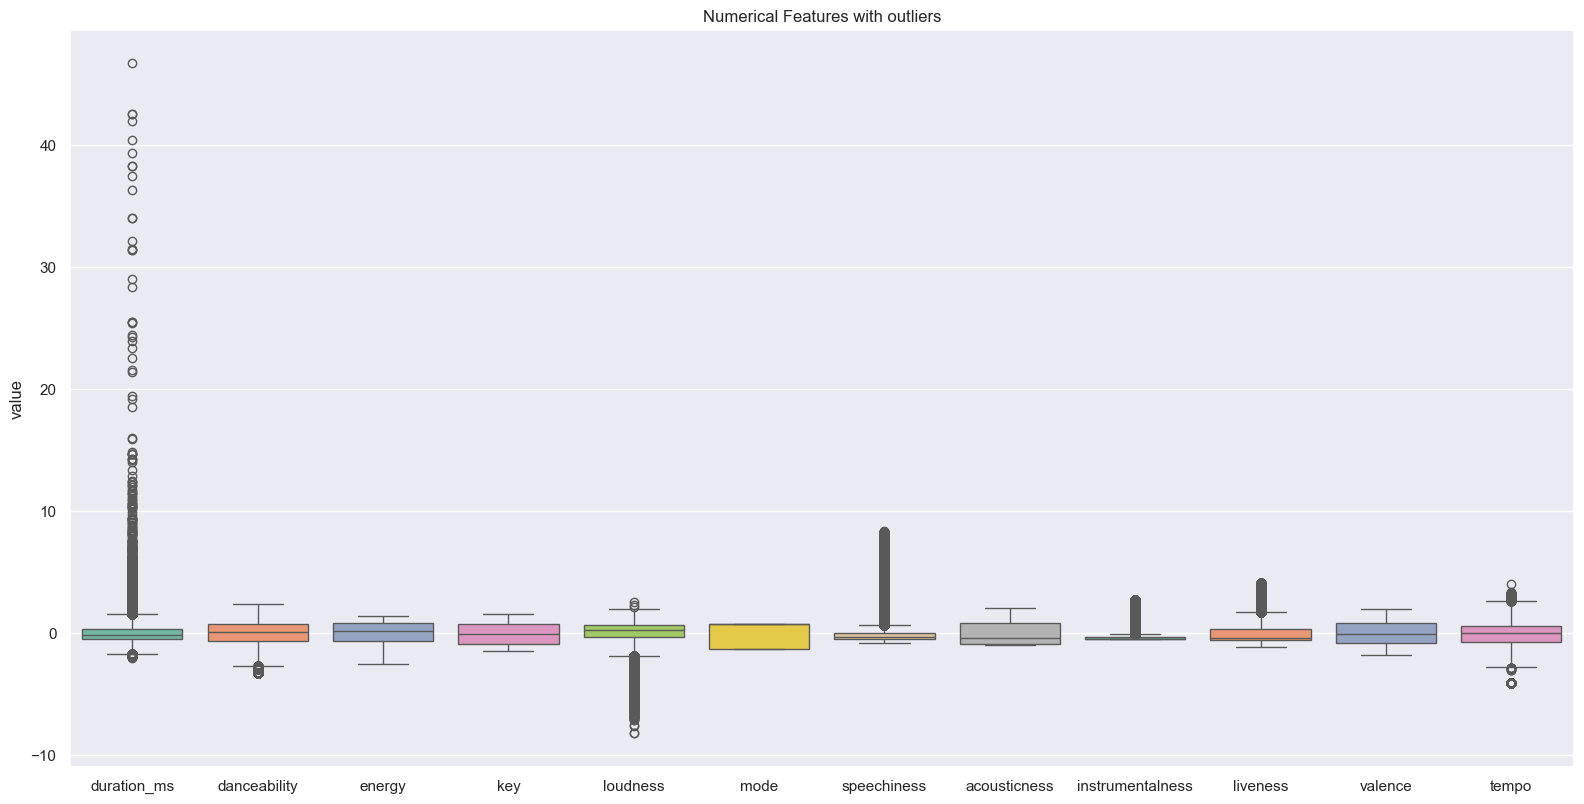

In [95]:
# Set seaborn theme for plotting 
sns.set_theme(style='darkgrid')

#Pandas melt to reshape from wide to long format where y will be value for plotting 
df_melt=pd.melt(df_scaled_num)
df_melt

#box plot with outliers
plt.figure(figsize=(16, 8))
sns.boxplot(x='variable', y='value', data=df_melt, palette='Set2')
plt.xlabel(None)
plt.tight_layout()
plt.title('Numerical Features with outliers')

Text(0.5, 1.0, 'Numercial Features without outliers')

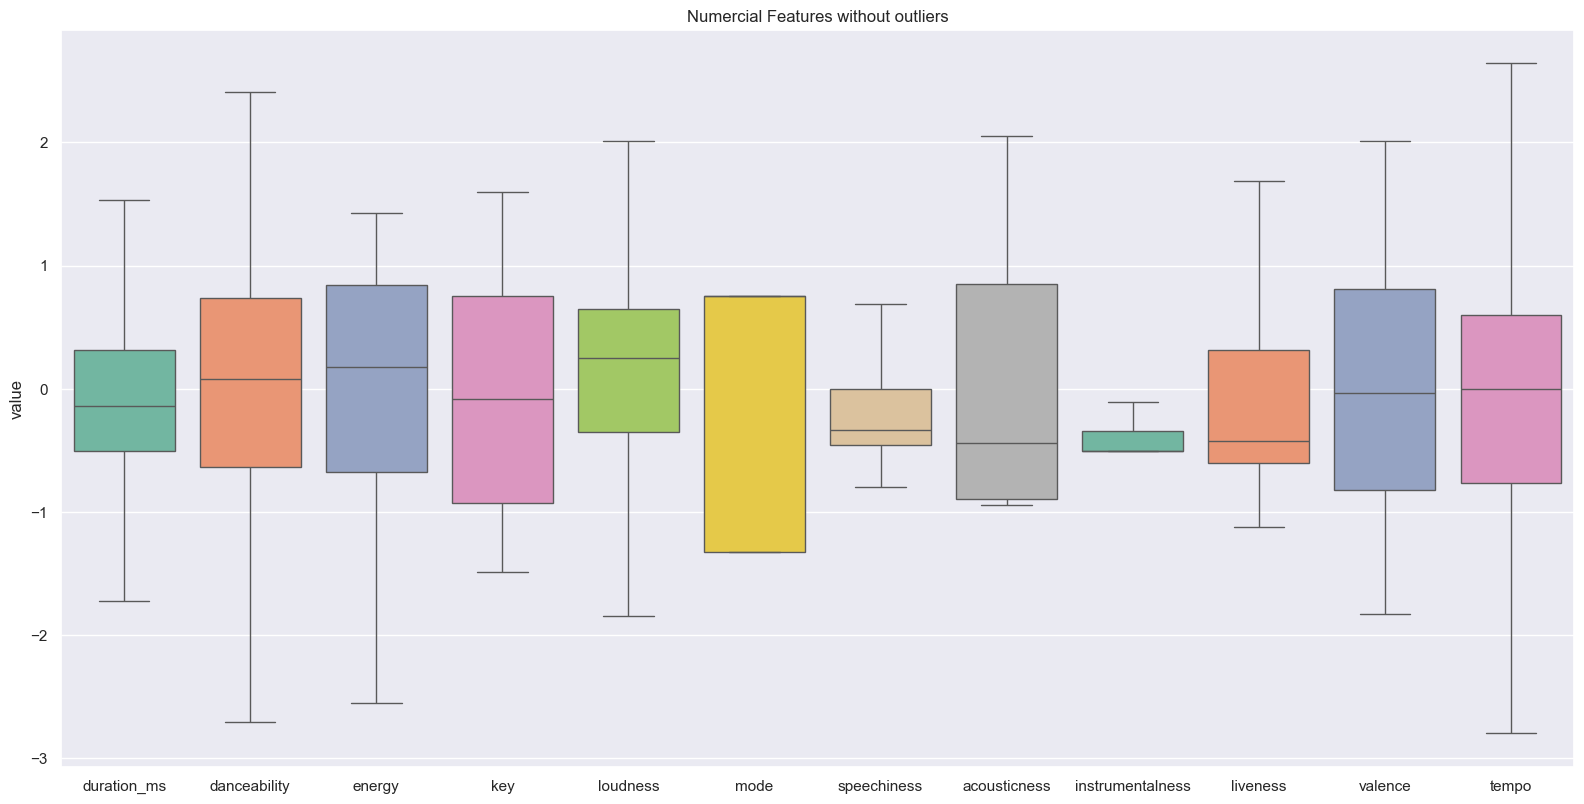

In [96]:
#box plot without outliers
plt.figure(figsize=(16, 8))
sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False, palette='Set2')
plt.xlabel(None)
plt.tight_layout()
plt.title('Numercial Features without outliers')

Removing outliers

In [97]:
# Code to check for outliers

df_outlier = df_scaled_num
for col in df_outlier.columns:
  q1=df_outlier[col].quantile(0.25)
  q3=df_outlier[col].quantile(0.75)
  inq=q3-q1
  filter=(df_outlier[col] >= q1-1.5*inq) & (df_outlier[col] <= q3+1.5*inq)
  df_outlier[col] = df_outlier[col].loc[filter]

In [98]:
# Number of outliers for each predictor
df_outlier.isna().sum()
print(f"Null values:\n{df_outlier.isna().sum()}")


Null values:
duration_ms          5616
danceability          620
energy                  0
key                     0
loudness             6173
mode                    0
speechiness         13211
acousticness            0
instrumentalness    25246
liveness             8642
valence                 0
tempo                 617
dtype: int64


In [99]:
# Dropping of 2 columns due to excessive outliers
df_outlier_drop = df_outlier.drop(axis=1, labels=['speechiness', 'instrumentalness'])
print(f"Columns dropped: {len(['speechiness', 'instrumentalness'])}")
print(f"Numerical columns remaning:\n {df_outlier_drop.columns}")

Columns dropped: 2
Numerical columns remaning:
 Index(['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'acousticness', 'liveness', 'valence', 'tempo'],
      dtype='object')


Correlation Matrix of Numerical Features

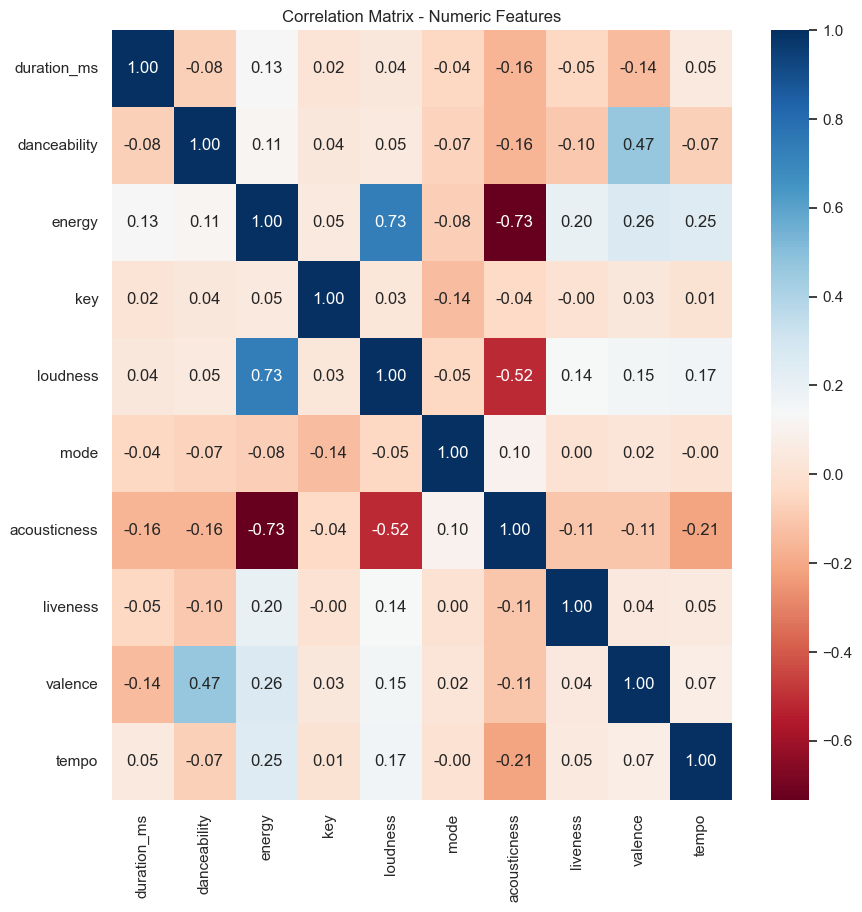

In [100]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_outlier_drop.corr(), annot=True, fmt=".2f", cmap= 'RdBu')
plt.title("Correlation Matrix - Numeric Features")
plt.show()

Creating final scaled dataset with all features (Track Names, etc.)

In [101]:
# Creating final scaled dataset with all features
scale = StandardScaler()

# Make dataframe copy as final df
df_final = trans_df.copy()

# Filter numeric columns for scaling (excluding target variable)
numeric_scale = df_final.select_dtypes(include=['float64', 'int64']).columns # Numeric datatypes only for scaling
# Drop target variable
numeric_scale = numeric_scale.drop('popularity_class')

# Scale remaining numeric features
df_final[numeric_scale] = scale.fit_transform(df_final[numeric_scale])

# Drop outliers identified
outlier_drop = df_final.drop(axis=1, labels=['speechiness', 'instrumentalness'])

# Verify scaling
print("Final dataset shape:", df_final.shape)
print("\nFeature columns after scaling:")
print(df_final.columns.tolist())


Final dataset shape: (113999, 17)

Feature columns after scaling:
['artists', 'album_name', 'track_name', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'track_genre', 'popularity_class']


In [102]:
df_final.head()

,artists,album_name,track_name,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,popularity_class
0,Gen Hoshino,Comedy,Comedy,0.024557,0.629239,-0.717147,-1.210434,0.300825,-1.326297,0.551843,-0.850193,-0.504111,0.758735,0.929315,-1.141854,acoustic,1
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,-0.730889,-0.845908,-1.889974,-1.210434,-1.784739,0.753979,-0.078995,1.831744,-0.504097,-0.591216,-0.798681,-1.489708,acoustic,1
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,-0.160353,-0.742187,-1.122667,-1.491334,-0.293289,0.753979,-0.273827,-0.315489,-0.504115,-0.507172,-1.365679,-1.528303,acoustic,1
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,-0.243236,-1.733301,-2.312987,-1.491334,-2.039246,0.753979,-0.457309,1.774605,-0.503886,-0.428381,-1.276965,1.987857,acoustic,1
4,Chord Overstreet,Hold On,Hold On,-0.271942,0.295026,-0.788709,-0.929534,-0.282751,0.753979,-0.303146,0.463409,-0.504115,-0.686290,-1.184394,-0.073343,acoustic,1


### Model Training

Create X and Y 

In [103]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [104]:
X = df_final.iloc[:,3:15]
print(f"Shape of X: {X.shape}")

Shape of X: (113999, 12)


In [105]:
y = df_final['popularity_class']
print(f"Shape of y: {y.shape}")

Shape of y: (113999,)


Train-Test Split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

### First Model Train

In [107]:
# Models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Scoring
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV